In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from FRCfuncs import *

In [2]:
wdir = r'N:\Singlem\singlem19-1\February\19_TS_STEDpowerSeries_NV_CG'
powers = np.arange(10,101,10)
#Data will be stored in a list. Each entry of list contains 3D image of type numpy array.
imStackLst = []
for power in powers:
    ext = 'Power Series\{0:d}pct\Red Photons'.format(power)
    filedir = os.path.join(wdir, ext)
    imStackLst.append (readfolder(filedir))

In [ ]:
def Hamming(w,h):
    alpha = 0.54
    beta = 1-alpha
    xv = alpha - beta * np.cos(2*np.pi / (w-1) * np.arange(w))
    yv = alpha - beta * np.cos(2*np.pi / (h-1) * np.arange(h))
    hamming = np.zeros([w,h])
    for i in range(h):
        hamming[i] = xv * yv[i]
    return hamming

applied drift correction of 0.778109 nm in x and and -2.013984 nm in y.



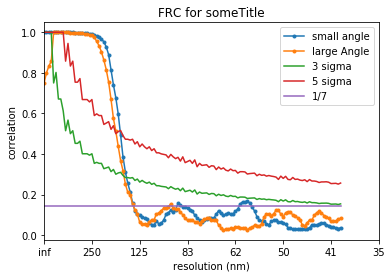

retrieved resolution for someTitle is: 132nm

applied drift correction of -0.431974 nm in x and and -1.589532 nm in y.



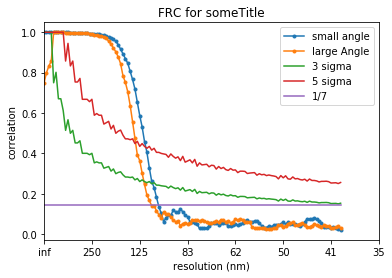

retrieved resolution for someTitle is: 111nm

applied drift correction of -0.575428 nm in x and and -0.839361 nm in y.



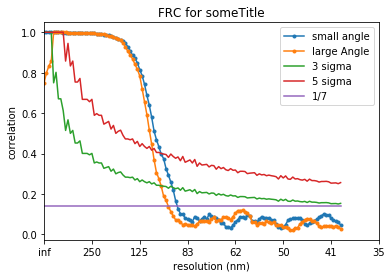

retrieved resolution for someTitle is: 96nm

applied drift correction of -0.155922 nm in x and and -0.557216 nm in y.



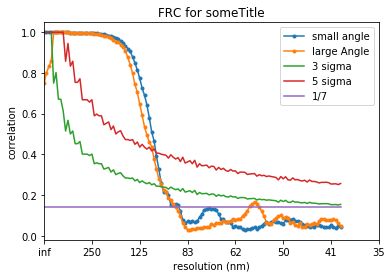

retrieved resolution for someTitle is: 91nm

applied drift correction of -0.313932 nm in x and and -0.525192 nm in y.



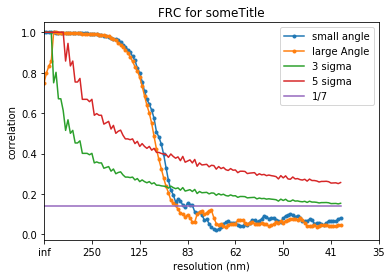

retrieved resolution for someTitle is: 89nm

applied drift correction of 0.147632 nm in x and and -0.917882 nm in y.



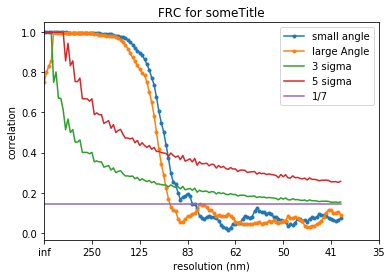

retrieved resolution for someTitle is: 94nm

applied drift correction of -0.102098 nm in x and and -0.333155 nm in y.



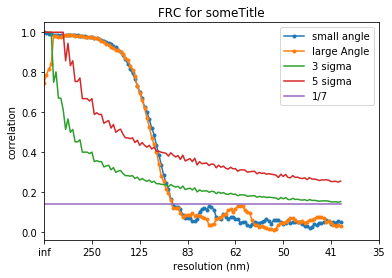

retrieved resolution for someTitle is: 93nm

applied drift correction of -0.512623 nm in x and and -0.141691 nm in y.



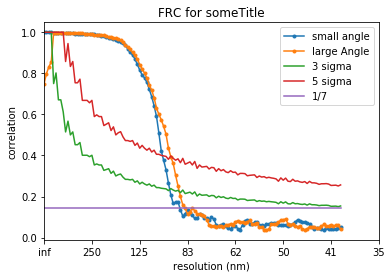

retrieved resolution for someTitle is: 85nm

applied drift correction of -0.742923 nm in x and and 1.376598 nm in y.



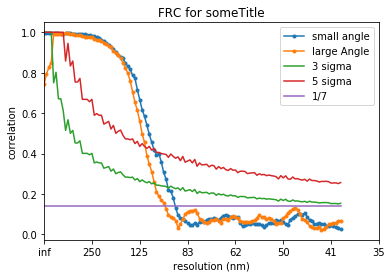

retrieved resolution for someTitle is: 98nm

applied drift correction of 0.277360 nm in x and and -0.130343 nm in y.



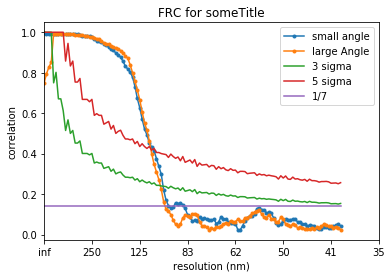

retrieved resolution for someTitle is: 98nm



In [3]:
Nimg = len(powers)
FRC = np.zeros(Nimg)
Bleaching = np.zeros(Nimg)
BleachingSigma = np.zeros(Nimg)
for i, imStack in enumerate(imStackLst):
    imA = np.sum(imStack[::2], axis = 0)
    imB = np.sum(imStack[1::2], axis =0)
    __, __, __, __, __, res = FRCAnalysis(imA, imB, 20, np.pi/4)
    FRC[i] = res[0,0]

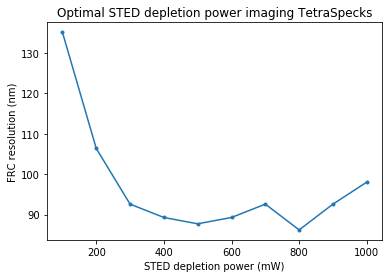

In [6]:
plt.plot(powers*10,FRC, '.-')
plt.xlabel('STED depletion power (mW)')
plt.ylabel(u'FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging TetraSpecks')
plt.show()

In [19]:

ext = r'TS_exc640_1perc_sted775_100perc_C1S3Ch26-56\Red Photons'
filedir = os.path.join(wdir, ext)
imStackA = readfolder (filedir)

ext = r'TS_exc640_1perc_sted775_100perc_C1S3Ch57-200\Red Photons'
filedir = os.path.join(wdir, ext)
imStackB = readfolder(filedir)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'N:\\Singlem\\singlem19-1\\February\\19_TS_STEDpowerSeries_NV_CG\\TS_exc640_1perc_sted775_0perc_C1S3Ch26-56\\Red Photons'

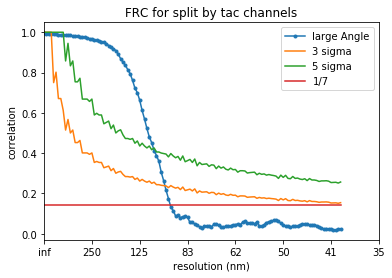

retrieved resolution for split by tac channels is: 94nm



In [8]:
imA = np.sum(imStackA, axis =0)
imB = np.sum(imStackB, axis =0)
title = 'split by tac channels'
__ = FRCAnalysis(imA, imB, 20, title = title)

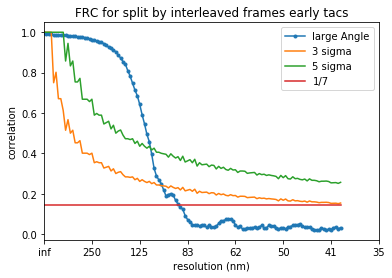

retrieved resolution for split by interleaved frames early tacs is: 88nm



In [9]:
imA = np.sum(imStackA[::2], axis =0)
imB = np.sum(imStackA[1::2], axis =0)
title = 'split by interleaved frames early tacs'
__ = FRCAnalysis(imA, imB, 20, title = title)

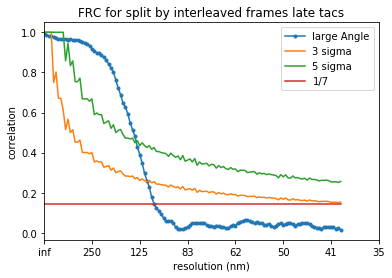

retrieved resolution for split by interleaved frames late tacs is: 106nm



In [10]:
imA = np.sum(imStackB[::2], axis =0)
imB = np.sum(imStackB[1::2], axis =0)
title = 'split by interleaved frames late tacs'
__ = FRCAnalysis(imA, imB, 20, title = title)

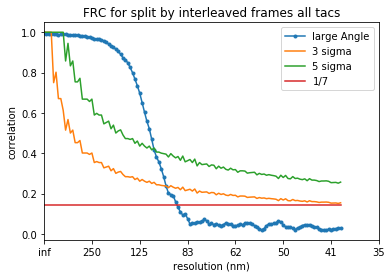

retrieved resolution for split by interleaved frames all tacs is: 89nm



In [11]:
imStackAB = imStackA + imStackB
imA = np.sum(imStackAB[::2], axis =0)
imB = np.sum(imStackAB[1::2], axis =0)
title = 'split by interleaved frames all tacs'
__ = FRCAnalysis(imA, imB, 20, title = title)